In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import scipy.optimize as sco
import random 
from matplotlib import rc
#import matplotlib.pylab as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

### Determination of parameters
>After importing all necessary libraries, we must define the securities, as well as the starting and ending date of the empirical testing. The list <em>tickers</em> contains the names of the securities and the variables <em>startDate</em>, <em>endDate</em> contain the duration of the simulation. As you can see, the selected time horizon is 3 years, from 1-1-2016 until 31-12-2019 and the selected equities of this example are 6 securities from the technology sector of NYSE stock exchange.

In [2]:
tickers = ['ACN', 'NOC', 'IBM', 'MSI', 'MSCI', 'ORA' ]

startDate = '2016-01-01'
endDate = '2018-12-31'

### Connection to the Yahoo API
>In the following part, we make the connection with the <em>yahoo! finance API</em>. This connection is made with the <em>data.DataReader</em> function of the pandas library. It takes four arguments: (a) a list with the names of the securities, (b) the starting date, (c) the ending date and (d) the name of the API (in this case 'yahoo'). For example, in the following cell you can see the historical values of the first security 'BP'. The result contains the values 'High', 'Low', 'Open', 'Close', 'Volume' and 'Adj Close'.

In [3]:
historicalDataNOC = data.DataReader('ACN', 'yahoo', startDate, endDate)
print("===========  Raw Data from Yahoo API  =========== \n")
display(historicalDataNOC)

===========  Raw Data from Yahoo API  =========== 



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,102.650002,100.970001,102.620003,101.830002,2817000.0,94.118355
2016-01-05,102.870003,101.470001,101.970001,102.360001,2409000.0,94.608208
2016-01-06,103.059998,100.540001,100.809998,102.160004,3134200.0,94.423355
2016-01-07,100.839996,98.839996,99.750000,99.160004,3194700.0,91.650566
2016-01-08,99.809998,98.000000,99.480003,98.199997,2330200.0,90.763252
...,...,...,...,...,...,...
2018-12-24,136.919998,133.600006,136.580002,133.669998,2305400.0,130.905731
2018-12-26,139.020004,132.630005,134.800003,139.009995,2488600.0,136.135315
2018-12-27,140.410004,134.690002,137.110001,140.410004,2684100.0,137.506363


### Data Pre-processing 
>From all the security values we only need the data of the 'Open' column in order to use it for the empirical testing. Therefore, we firstly draw all the desired data from the Yahoo API and then we discard the unnecessary columns, as follows:

In [4]:
historicalValues = data.DataReader(tickers, 'yahoo', startDate, endDate)
stockValues = historicalValues['Open']
numOfDates = stockValues.shape[0]
numOfSecurities = stockValues.shape[1]
print("Number of securities:", numOfSecurities)
print("Number of dates:", numOfDates, "\n")
print("==============  Stock Values  ============== \n")
stockValues = stockValues.fillna(method='ffill')
display(stockValues)

Number of securities: 6
Number of dates: 754 

==============  Stock Values  ============== 



Symbols,ACN,NOC,IBM,MSI,MSCI,ORA
Date,,,,,,
2016-01-04,102.620003,185.979996,135.600006,67.669998,71.099998,35.630001
2016-01-05,101.970001,187.850006,136.759995,66.500000,70.610001,35.150002
2016-01-06,100.809998,190.160004,134.380005,65.570000,70.260002,34.790001
2016-01-07,99.750000,187.899994,133.699997,64.629997,69.239998,35.040001
2016-01-08,99.480003,188.789993,133.179993,64.330002,69.580002,35.520000
...,...,...,...,...,...,...
2018-12-24,136.580002,232.600006,109.900002,110.930000,136.270004,51.090000
2018-12-26,134.800003,226.529999,108.000000,109.510002,135.639999,51.139999
2018-12-27,137.110001,231.050003,109.989998,110.669998,139.839996,51.139999


## Security Values Visualisation
### Individual diagram for one security 
>Now, the dataframe <em>stockValues</em> contains the historical values of the securities. These values can be easily visualised with matplotlib library. The visualisation of security 'ACN' is presented below:

(array([735964., 736085., 736208., 736330., 736450., 736573., 736695.,
        736815., 736938., 737060.]), <a list of 10 Text xticklabel objects>)

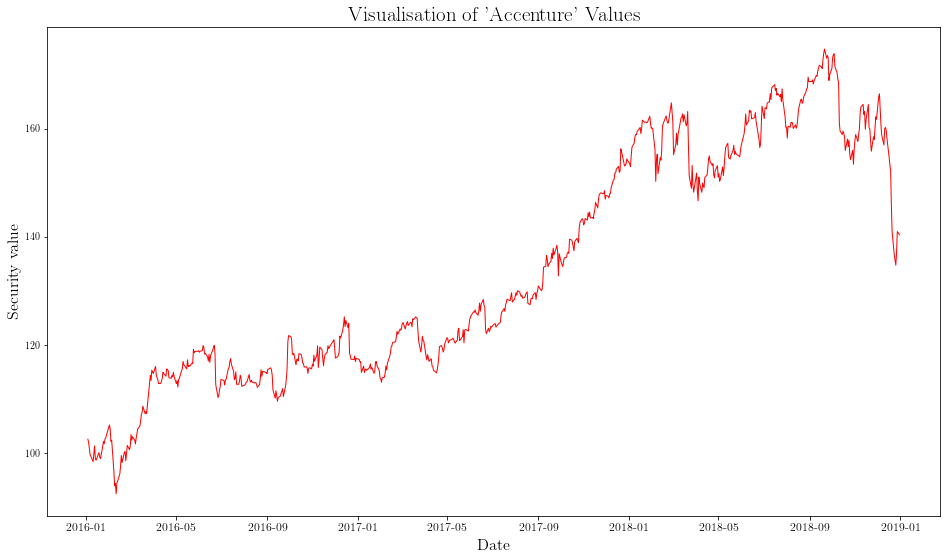

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(16,9))
plt.plot(stockValues.index, stockValues['ACN'], color='red', lw=1)
plt.xlabel(r"Date", fontsize=16)
plt.ylabel(r"Security value", fontsize=16)
plt.title(r"Visualisation of 'Accenture' Values", fontsize=21)
plt.xticks(fontsize=12, rotation=0)


### Common diagram for all securities
>Additionally, the returns of all the securities can be visualised in the same figure, as follows:

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


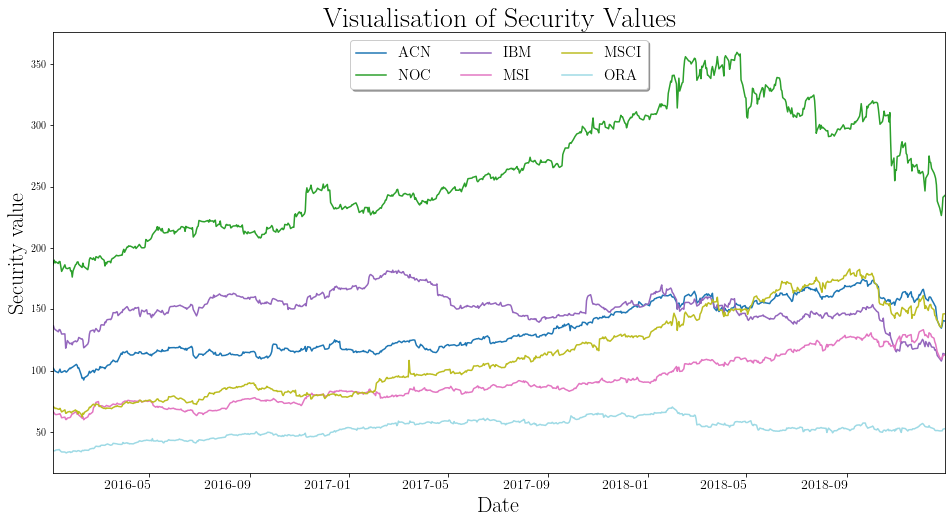

In [6]:
fig = stockValues.plot(figsize=(16,9), cmap='tab20')
plt.xlabel(r"Date", fontsize=22)
plt.ylabel(r"Security value", fontsize=22)
plt.title(r"Visualisation of Security Values", fontsize=28)
plt.xticks(fontsize=14, rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=15, fancybox=True, shadow=True)
plt.savefig("barplot6.png", dpi=200)

### Security Returns
>The following step is the calculation of the arithmetical return of the securities. This step is executed by converting the pandas dataframe to numpy array in order to make the calculations and then converting the returns list back to dataframe. Given the historical values the calculation of the arithmetical return is presented below:

In [7]:
stockValuesArray = pd.DataFrame(stockValues).to_numpy()
stockReturnsArray = np.empty(shape = (numOfDates-1, numOfSecurities))
for i in range(numOfSecurities):
    for j in range(numOfDates-1):
        stockReturnsArray[j][i] = (stockValuesArray[j+1][i]-stockValuesArray[j][i])/stockValuesArray[j][i]
returnDates = stockValues.index[1:]
stockReturns = pd.DataFrame(stockReturnsArray, index=returnDates, columns=stockValues.columns) 
print("============  Stock Returns  ============ \n")
display(stockReturns)

============  Stock Returns  ============ 



Symbols,ACN,NOC,IBM,MSI,MSCI,ORA
Date,,,,,,
2016-01-05,-0.006334,0.010055,0.008554,-0.017290,-0.006892,-0.013472
2016-01-06,-0.011376,0.012297,-0.017403,-0.013985,-0.004957,-0.010242
2016-01-07,-0.010515,-0.011885,-0.005060,-0.014336,-0.014518,0.007186
2016-01-08,-0.002707,0.004737,-0.003889,-0.004642,0.004911,0.013699
2016-01-11,-0.010052,-0.006939,-0.010287,0.005130,-0.011785,0.006475
...,...,...,...,...,...,...
2018-12-24,-0.031485,-0.023837,-0.023111,-0.039567,-0.035735,-0.006997
2018-12-26,-0.013033,-0.026096,-0.017288,-0.012801,-0.004623,0.000979
2018-12-27,0.017136,0.019953,0.018426,0.010593,0.030964,0.000000


### Returns Visualisation
>The visualisation of the return of each security is presented in the following figure:

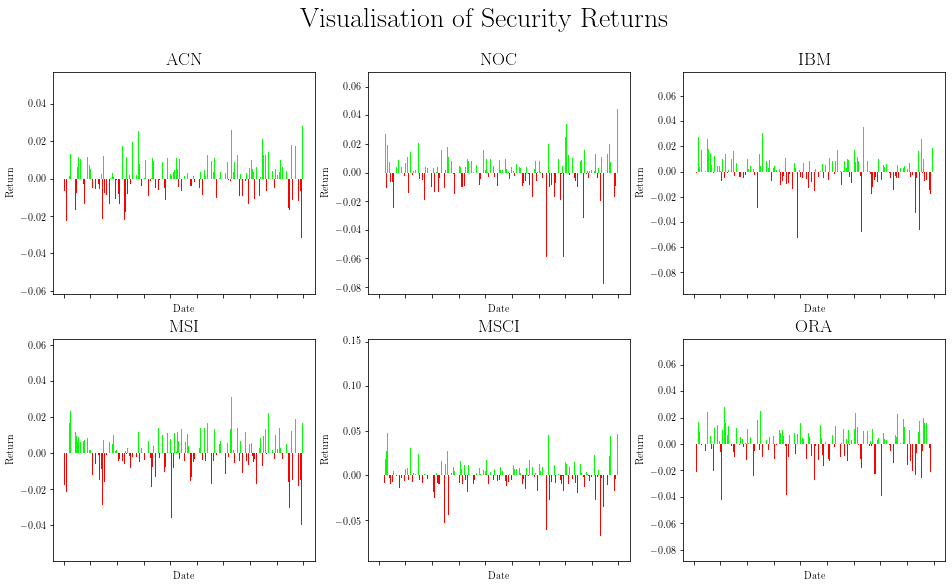

In [8]:
fig, ax = plt.subplots(2, 3, figsize=(16,9))
for j in range(numOfSecurities):
    colors = np.array([(1,0,0)]*len(returnDates))
    for i in range(numOfDates-1):
        if stockReturnsArray[i][j] > 0:
            colors[i] = (0,1,0)
    ax[j//3,j%3].bar(returnDates, stockReturnsArray[:,j], color=colors)
    ax[j//3,j%3].set_title(stockValues.columns[j], fontsize=18)
    ax[j//3,j%3].set_xticklabels([])
    ax[j//3,j%3].set_xlabel("Date")
    ax[j//3,j%3].set_ylabel("Return")
    fig.suptitle('Visualisation of Security Returns', fontweight='bold', fontsize=28)
plt.savefig("barplot7.png", dpi=300)

### Financial Statistics
>In the next step, some fundamental statistical indices of the data are calculated. This proccess is made with the numpy library which supports a variety of statistical calculations, as shown in the following section:

In [9]:
from scipy.stats import kurtosis, skew

MinReturn = [0 for i in range(numOfSecurities)]
MaxReturn = [0 for i in range(numOfSecurities)]
MedianReturn = [0 for i in range(numOfSecurities)]
MeanReturn = [0 for i in range(numOfSecurities)]
SD = [0 for i in range(numOfSecurities)]
VaR99 = [0 for i in range(numOfSecurities)]
VaR97 = [0 for i in range(numOfSecurities)]
VaR95 = [0 for i in range(numOfSecurities)]
Skewness = [0 for i in range(numOfSecurities)]
Kurtosis = [0 for i in range(numOfSecurities)]
AbsMinPerSD = [0 for i in range(numOfSecurities)]

for i in range(numOfSecurities):
	MinReturn[i] = np.min(stockReturnsArray[:,i])
	MaxReturn[i] = np.max(stockReturnsArray[:,i])
	MedianReturn[i] = np.median(stockReturnsArray[:,i])
	MeanReturn[i] = np.mean(stockReturnsArray[:,i])
	SD[i] = np.std(stockReturnsArray[:,i])
	VaR99[i] = np.percentile(stockReturnsArray[:,i], 1)
	VaR97[i] = np.percentile(stockReturnsArray[:,i], 3)
	VaR95[i] = np.percentile(stockReturnsArray[:,i], 5)
	Skewness[i] = skew(stockReturnsArray[:,i], bias=False)
	Kurtosis[i] = kurtosis(stockReturnsArray[:,i], bias=False)
	AbsMinPerSD[i] = np.abs(MinReturn[i])/SD[i]

statistics = pd.DataFrame(
    {'MinReturn': MinReturn,
     'MaxReturn': MaxReturn,
     'Median': MedianReturn,
     'Mean': MeanReturn,
     'SD': SD,
     'VaR99': VaR99,
     'VaR97': VaR97,
     'VaR95': VaR95,
     'Skewness': Skewness,
     'Kurtosis': Kurtosis,
     'AbsMinPerSD': AbsMinPerSD,     
    }, index=stockValues.columns)    
    
    
display(statistics)

,MinReturn,MaxReturn,Median,Mean,SD,VaR99,VaR97,VaR95,Skewness,Kurtosis,AbsMinPerSD
Symbols,,,,,,,,,,,
ACN,-0.056337,0.051843,0.001509,0.000480,0.011213,-0.035905,-0.022927,-0.017429,-0.658652,3.198245,5.024272
NOC,-0.077808,0.063431,0.000676,0.000448,0.013467,-0.049242,-0.024005,-0.019069,-0.674012,6.010290,5.777613
IBM,-0.089540,0.071541,0.000000,-0.000162,0.012330,-0.036385,-0.022937,-0.017667,-0.478771,7.086411,7.261800
MSI,-0.054133,0.058159,0.001211,0.000757,0.012276,-0.035977,-0.026263,-0.018172,-0.169242,2.672691,4.409556
MSCI,-0.084600,0.142090,0.001597,0.001079,0.015456,-0.039073,-0.028230,-0.021382,0.579821,12.724204,5.473484
ORA,-0.080762,0.072031,0.000496,0.000634,0.014553,-0.042588,-0.026683,-0.021765,-0.436693,3.334074,5.549322


### Covariance - Correlation
>Now, given the arithmetical returns of the securities we can compute the variance=covariance matrix among all securities. The computation can be achieved with the pandas function cov() which calculates the covariance matrix of a dataframe.

In [10]:
cov = stockReturns.cov()
covarianceMatrix = np.array(cov)
print("============  Covariance Matrix  ============")
display(cov)

============  Covariance Matrix  ============


Symbols,ACN,NOC,IBM,MSI,MSCI,ORA
Symbols,,,,,,
ACN,0.000126,0.000056,0.000061,0.000057,0.000078,0.000051
NOC,0.000056,0.000182,0.000045,0.000053,0.000071,0.000035
IBM,0.000061,0.000045,0.000152,0.000050,0.000066,0.000041
MSI,0.000057,0.000053,0.000050,0.000151,0.000082,0.000046
MSCI,0.000078,0.000071,0.000066,0.000082,0.000239,0.000046
ORA,0.000051,0.000035,0.000041,0.000046,0.000046,0.000212


>The correlation matrix can be computed accordingly, with the corr() function:

In [11]:
correlation = stockReturns.corr()
print("============  Correlation Matrix  ============")
correlation.style.background_gradient(cmap='Wistia').set_precision(3)


============  Correlation Matrix  ============


Symbols,ACN,NOC,IBM,MSI,MSCI,ORA
Symbols,,,,,,
ACN,1,0.372,0.438,0.415,0.447,0.313
NOC,0.372,1,0.27,0.317,0.339,0.176
IBM,0.438,0.27,1,0.331,0.345,0.227
MSI,0.415,0.317,0.331,1,0.429,0.256
MSCI,0.447,0.339,0.345,0.429,1,0.205
ORA,0.313,0.176,0.227,0.256,0.205,1


## Portfolio Optimisation
>In this section we attempt to optimise the portfolio of securities, using the mean - variance method. The  optimisation problem is a quadratic bi-objective problem, which will be solved parametrically setting th expected return as a parameter. We use the scipy optimiser library in order to solve the problem:  

### Global Minimum Variance Portfolio
>Initially, we compute the global minimum variance portfolio (GMVP) using the scipy minimise function. The minimise function takes as an argument the mean return column-vector and the covariance 2D matrix and computes the proportions of the GMVP minimising the quantity defined in the function named 'Portfolio Volatility' which is the standard deviation of the portfolio. Additionally, we set the constraint that the weights sum to 1 and that the bounds of the proportions are (0,1), imposing the short sales restriction.

Risk of minimum volatility portfolio: 0.008501272989289266
Return of minimum volatility portfolio: 0.00043069623181251645
Sharpe Ratio of minimum volatility portfolio: 0.05066255751993256
[0.19854886 0.18424055 0.21453575 0.18742103 0.02083155 0.19442226]


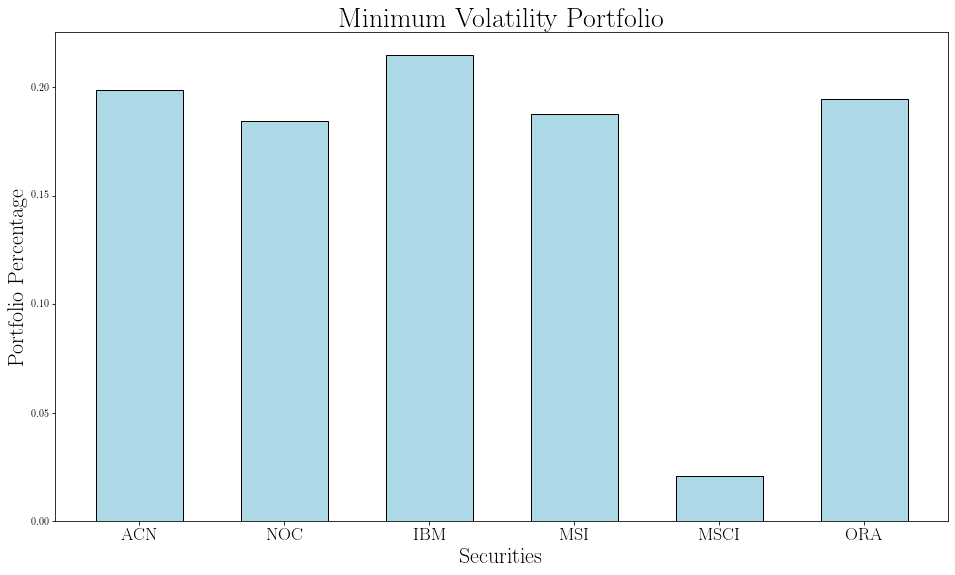

In [12]:
#Objective Function
def portfolioVolatility(weights, MeanReturn, covarianceMatrix):
    std = np.sqrt(np.dot(weights.T, np.dot(covarianceMatrix, weights))) 
    return std

#Constraints
args = (MeanReturn, covarianceMatrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0,1)
bounds = tuple(bound for asset in range(numOfSecurities))

#Optimisation Function
minVolatilityPortfolio = sco.minimize(portfolioVolatility, numOfSecurities*[1./numOfSecurities,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)

sdPort1 = np.sqrt(np.dot(minVolatilityPortfolio['x'].T, np.dot(covarianceMatrix, minVolatilityPortfolio['x']))) 
retPort1 = np.sum(MeanReturn*minVolatilityPortfolio['x'] ) 


print("Risk of minimum volatility portfolio:", sdPort1)
print("Return of minimum volatility portfolio:", retPort1)
print("Sharpe Ratio of minimum volatility portfolio:", retPort1/sdPort1)
print(minVolatilityPortfolio['x'])

plt.figure(figsize=(16,9))
plt.bar(tickers, minVolatilityPortfolio['x'], color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r"Securities", fontsize=22)
plt.ylabel(r"Portfolio Percentage", fontsize=22)
plt.title(r"Minimum Volatility Portfolio", fontsize=28)
plt.xticks(fontsize=18, rotation=0)
plt.savefig("barplot8.png", dpi=300)

### Max Sharpe Ratio Portfolio
>With the same function we can compute the portfolio that maximises the sharpe ratio. The only difference between this and the previou step is the different minimisation function, which now is altered in order to maximise sharpe ratio. Because of the definition of the scipy minimise function we should form a minimisation problem. Therefore, we define the quantity of negative sharpe ratio, which should be minimised in order to maximise positive sharpe ratio.

Risk of maximum sharpe ratio portfolio: 0.010552553615424863
Return of maximum sharpe ratio portfolio: 0.0008610545910496075
Maximum Sharpe Ratio: 0.08159679850296975


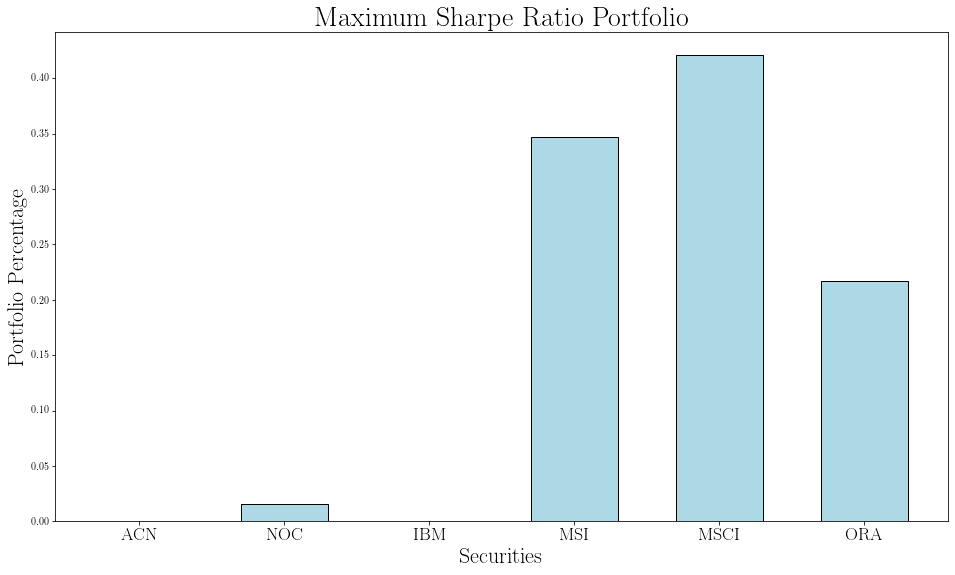

In [13]:
#Objective Function
def negSharpeRatio(weights, MeanReturn, covarianceMatrix):
    returns = np.sum(MeanReturn*weights )
    std = np.sqrt(np.dot(weights.T, np.dot(covarianceMatrix, weights)))
    return (- returns / std)

#Constraints
args = (MeanReturn, covarianceMatrix)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bound = (0,1)
bounds = tuple(bound for asset in range(numOfSecurities))

#Optimisation Function
maxSharpeRatioPortfolio = sco.minimize(negSharpeRatio, numOfSecurities*[1./numOfSecurities,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)

sdPort2 = np.sqrt(np.dot(maxSharpeRatioPortfolio['x'].T, np.dot(covarianceMatrix, maxSharpeRatioPortfolio['x']))) 
retPort2 = np.sum(MeanReturn*maxSharpeRatioPortfolio['x'] ) 

print("Risk of maximum sharpe ratio portfolio:", sdPort2)
print("Return of maximum sharpe ratio portfolio:", retPort2)
print("Maximum Sharpe Ratio:", retPort2/sdPort2)

plt.figure(figsize=(16,9))
plt.bar(tickers,maxSharpeRatioPortfolio['x'], color = 'lightblue', edgecolor = 'black', width=0.6)
plt.xlabel(r"Securities", fontsize=22)
plt.ylabel(r"Portfolio Percentage", fontsize=22)
plt.title(r"Maximum Sharpe Ratio Portfolio", fontsize=28)
plt.xticks(fontsize=18, rotation=0)
plt.savefig("barplot10.png", dpi=300)

### Efficient Frontier 
>In this step, we parametrically solve the same problem in order to gradually find the efficient frontier. Therefore, we compute a number of efficient portfolios between the GMVP and the maximum return portfolio.

In [14]:
numOfPortfolios = 30
maxReturn = max(MeanReturn)
returnRange = np.linspace(retPort1, maxReturn, numOfPortfolios)
efficientFrontier = []
AllReturns = []
AllSDs = []
for target in returnRange:
    args = (MeanReturn, covarianceMatrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(MeanReturn*x) - target},
	                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(numOfSecurities))
    result = sco.minimize(portfolioVolatility, numOfSecurities*[1./numOfSecurities,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    efficientFrontier.append(result)
    AllSDs.append(np.sqrt(np.dot(result['x'].T, np.dot(covarianceMatrix, result['x']))))
    AllReturns.append(np.sum(MeanReturn*result['x']))    

>The formulated portfolios are presented below:

,ACN,NOC,IBM,MSI,MSCI,ORA
1,0.20,0.18,0.22,0.19,0.02,0.19
2,0.20,0.18,0.20,0.19,0.04,0.20
3,0.20,0.18,0.18,0.20,0.05,0.20
4,0.19,0.18,0.16,0.21,0.06,0.20
5,0.19,0.17,0.14,0.21,0.07,0.21
6,0.19,0.17,0.12,0.22,0.08,0.21
7,0.19,0.17,0.10,0.23,0.10,0.21
8,0.19,0.17,0.08,0.23,0.11,0.22
9,0.19,0.17,0.06,0.24,0.12,0.22
10,0.19,0.17,0.04,0.25,0.13,0.23


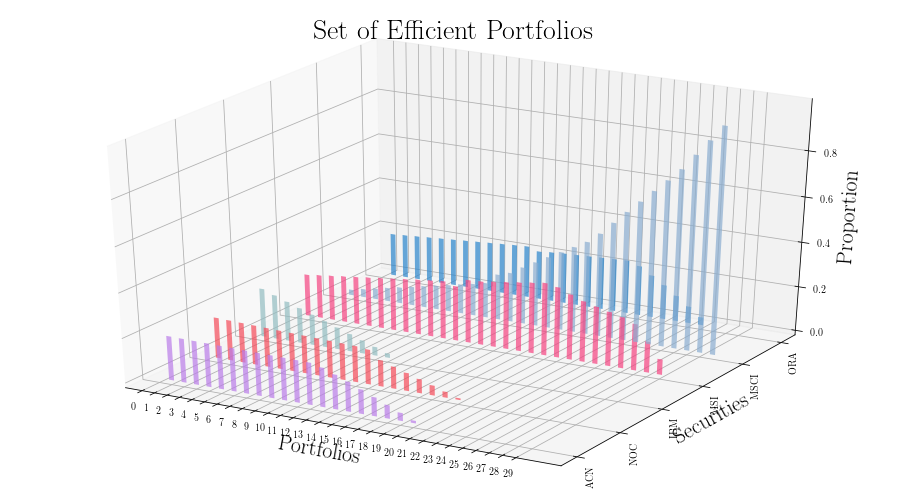

In [15]:
efficientPortfolios = [0 for i in range(numOfPortfolios)]
for i in range(numOfPortfolios):
    efficientPortfolios[i] = np.round(efficientFrontier[i].x,2)

df = pd.DataFrame(efficientPortfolios, columns=tickers)
df.index = df.index + 1
display(df)

weightingFactor = [[0 for i in range(numOfPortfolios)] for j in range(numOfSecurities)]
for i in range(numOfSecurities):
    for j in range(numOfPortfolios):
        weightingFactor[i][j] = efficientFrontier[j].x[i]
        
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection='3d')
for z in range(numOfSecurities):
    xs = np.arange(1, numOfPortfolios+1)
    ys = weightingFactor[z]
    cs =(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))
    ax.bar(xs, ys, z, zdir='y', color=cs, alpha=0.7, width=0.4)
plt.yticks(np.arange(numOfSecurities), tickers, rotation='vertical')
plt.xticks(np.arange(numOfPortfolios))
ax.set_xlabel(r'Portfolios', fontsize=22)
ax.set_ylabel(r'Securities', fontsize=22)
ax.set_zlabel(r'Proportion', fontsize=22)
plt.title(r"Set of Efficient Portfolios", fontsize=28)
plt.savefig("barplot11.png", dpi=150)

### Security average proportion and participation
>Finally, we can determine the percrentage of participation of each security in the efficient portfolios in order to obtain another perspective of the solution. In the following section, we present the according idea:

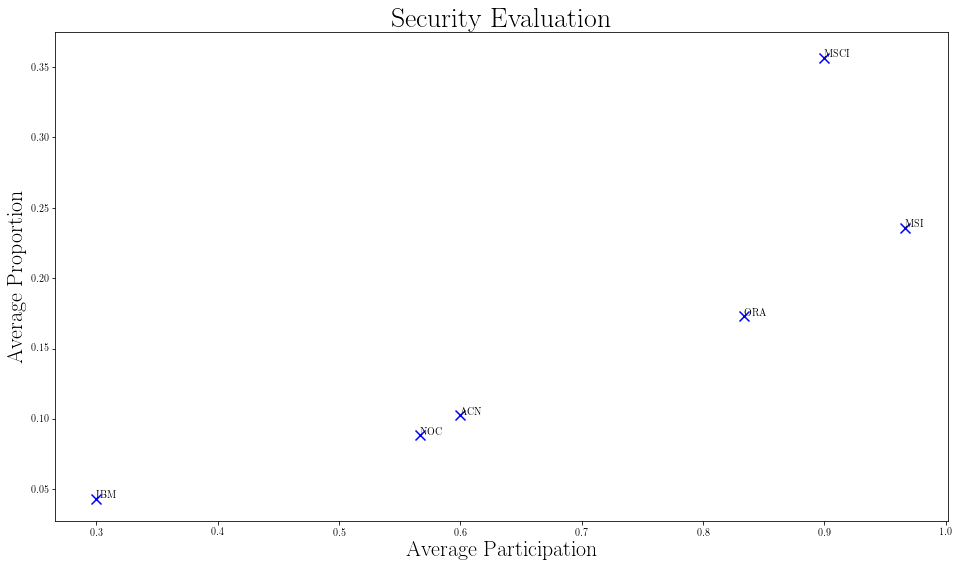

In [16]:
securityParticipation = [0 for i in range(numOfSecurities)]
for i in range(numOfSecurities):
    for j in range(numOfPortfolios):
        if weightingFactor[i][j] >= 0.05:
            securityParticipation[i] = securityParticipation[i] + 1
    securityParticipation[i] = securityParticipation[i] / numOfPortfolios
            
securityAvgProportion = [0 for i in range(numOfSecurities)]
for i in range(numOfSecurities):
    securityAvgProportion[i] = np.mean(weightingFactor[i])

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

colors = cm.rainbow(np.linspace(0, 1, numOfSecurities))
for i,c in zip(range(numOfSecurities),colors):
    if(securityParticipation[i] != 0):
        plt.scatter(securityParticipation[i], securityAvgProportion[i], c='b', marker='x' ,label=tickers[i], s=100)

for i, txt in enumerate(tickers):
    if(securityParticipation[i] != 0):
        ax.annotate(txt, (securityParticipation[i], securityAvgProportion[i]))
plt.xlabel(r"Average Participation", fontsize=22)
plt.ylabel(r"Average Proportion", fontsize=22)
plt.title(r"Security Evaluation", fontsize=28)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True, shadow=True)
plt.savefig("barplot10.png", dpi=300)

>The securities which are placed in the upper right section of the figure are the most dominant investment opportunities.